In [42]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.lines import Line2D
from matplotlib.patches import Circle

# File to Load (Remember to change these)
Pyber_city_data_to_load = "data/city_data.csv"
Pyber_ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
Pyber_city_df = pd.read_csv("data/city_data.csv")
Pyber_city_df.head(2)

Pyber_ride_df = pd.read_csv("data/ride_data.csv")
Pyber_ride_df.head(2)





,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577


In [43]:
# Combine the data into a single dataset
Pyber_merge_df = pd.merge(Pyber_ride_df, Pyber_city_df, how="left", on=["city", "city"])
# Combine the data into a single dataset
Pyber_merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


# Bubble Plot of Ride Sharing Data

In [44]:
#df_filtered = Pyber_merge_df[(Pyber_merge_df.type == 'Urban')]
#print(df_filtered)
#Pyber_merge_df.to_csv('merge.csv')
Pyber_plot_df = Pyber_merge_df.groupby(['city', 'type']).agg({'fare' : 'mean', 'ride_id':'count', 'driver_count' :'min'})
Pyber_plot_df.reset_index(level=['city', 'type'], inplace =True)

Pyber_plot_urban_df = Pyber_plot_df.loc[Pyber_plot_df.type == 'Urban'] 
Pyber_plot_suburban_df = Pyber_plot_df.loc[Pyber_plot_df.type == 'Suburban'] 
Pyber_plot_rural_df = Pyber_plot_df.loc[Pyber_plot_df.type == 'Rural'] 

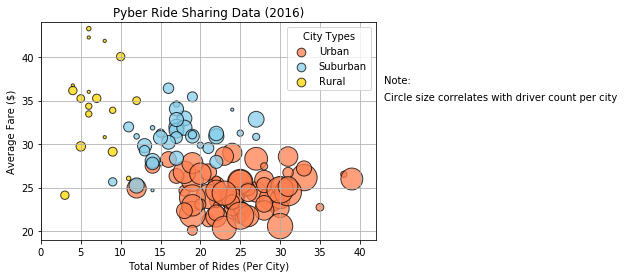

In [45]:
#Pyber_merge_df['ride_id']
Pyber_urban_scatter = plt.scatter(Pyber_plot_urban_df['ride_id'], Pyber_plot_urban_df['fare'], 
            Pyber_plot_urban_df['driver_count']*10, alpha=0.75, edgecolors="black", facecolor="coral" )
Pyber_suburban_scatter = plt.scatter(Pyber_plot_suburban_df['ride_id'], Pyber_plot_suburban_df['fare'], 
            Pyber_plot_suburban_df['driver_count']*10, alpha=0.75, edgecolors="black", facecolor="skyblue")
Pyber_rural_scatter = plt.scatter(Pyber_plot_rural_df['ride_id'], Pyber_plot_rural_df['fare'], 
            Pyber_plot_rural_df['driver_count']*10, alpha=0.75, edgecolors="black", facecolor="Gold")

Pyber_legend = plt.legend((Pyber_urban_scatter, Pyber_suburban_scatter, Pyber_rural_scatter), ("Urban", "Suburban", "Rural"),
           loc="upper right", title="City Types")
Pyber_legend.legendHandles[0]._sizes = [75]
Pyber_legend.legendHandles[1]._sizes = [75]
Pyber_legend.legendHandles[2]._sizes = [75]

plt.xlim(0,42)
plt.ylim(19,44)
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid()


plt.text(43, 37, 'Note: ')
plt.text(43, 35, 'Circle size correlates with driver count per city')



plt.show()

Total Fares by City Type

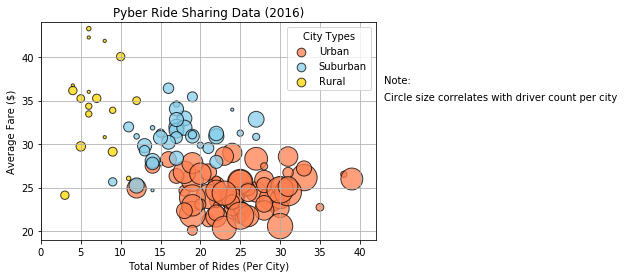

In [46]:
#Pyber_merge_df['ride_id']
Pyber_urban_scatter = plt.scatter(Pyber_plot_urban_df['ride_id'], Pyber_plot_urban_df['fare'], 
            Pyber_plot_urban_df['driver_count']*10, alpha=0.75, edgecolors="black", facecolor="coral" )
Pyber_suburban_scatter = plt.scatter(Pyber_plot_suburban_df['ride_id'], Pyber_plot_suburban_df['fare'], 
            Pyber_plot_suburban_df['driver_count']*10, alpha=0.75, edgecolors="black", facecolor="skyblue")
Pyber_rural_scatter = plt.scatter(Pyber_plot_rural_df['ride_id'], Pyber_plot_rural_df['fare'], 
            Pyber_plot_rural_df['driver_count']*10, alpha=0.75, edgecolors="black", facecolor="Gold")
                   
Pyber_legend = plt.legend((Pyber_urban_scatter, Pyber_suburban_scatter, Pyber_rural_scatter), ("Urban", "Suburban", "Rural"),
           loc="upper right", title="City Types")
Pyber_legend.legendHandles[0]._sizes = [75]
Pyber_legend.legendHandles[1]._sizes = [75]
Pyber_legend.legendHandles[2]._sizes = [75]

plt.xlim(0,42)
plt.ylim(19,44)
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid()


plt.text(43, 37, 'Note: ')
plt.text(43, 35, 'Circle size correlates with driver count per city')



plt.show()

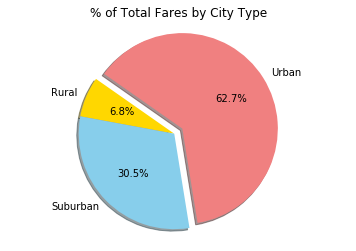

In [47]:
# Calculate Type Percents
#Total Fares percentage by city types: 

Pyber_Total_Fare = Pyber_merge_df.groupby('type')["fare"].sum().reset_index()
Pyber_Total_Fare

#Pyber_Total_Fare_Percent 

# Build Pie Chart
#matplotlib.org resource
labels = ['Rural', 'Suburban', 'Urban'] 
sizes = ['4327.93', '19356.33', '39854.38']
colors = ['gold', 'skyblue', 'lightcoral']
explode = [0, 0, 0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', center=(0, 1), shadow=True, startangle=145) 
plt.axis('equal')
plt.title("% of Total Fares by City Type")

plt.show()
# Save Figure



In [48]:
# Calculate Ride Percents
Pyber_Total_Rides = Pyber_merge_df.groupby('type')["date"].count().reset_index()
Pyber_Total_Rides



,type,date
0,Rural,125
1,Suburban,625
2,Urban,1625


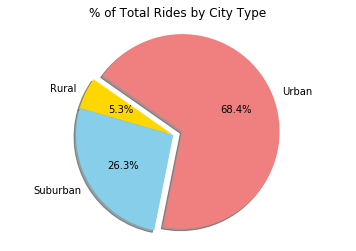

In [49]:
# Build Pie Chart
Pyber_Total_Rides = Pyber_merge_df.groupby('type')["ride_id"].sum().reset_index()
Pyber_Total_Rides

labels = ['Rural', 'Suburban', 'Urban'] 
sizes = ['125', '625', '1625']
colors = ['gold', 'skyblue', 'lightcoral']
explode = [0, 0, 0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', center=(0, 1), shadow=True, startangle=145) 
plt.axis('equal')
plt.title("% of Total Rides by City Type")

plt.show()


# Save Figure

In [50]:
#Total Drivers by City Type


# Calculate Driver Percents
Pyber_Drivers = Pyber_city_df.groupby('type')["driver_count"].sum().reset_index()
Pyber_Drivers


,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


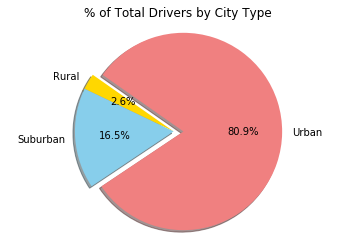

In [51]:
# Build Pie Charts
labels = ['Rural', 'Suburban', 'Urban'] 
sizes = ['78', '490', '2405']
colors = ['gold', 'skyblue', 'lightcoral']
explode = [0, 0, 0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', center=(0, 1), shadow=True, startangle=145) 

plt.axis('equal')
plt.title("% of Total Drivers by City Type")

plt.show()
# Save Figure